# Task 1

# 1.Import required python libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings('ignore')

# 2.Import data from the data source.

In [2]:
df=pd.read_csv('DS2_C6_S2_CarSales_Data_Challenge.csv')
df

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


# 3.Check the structure of the data.

In [3]:
df.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [4]:
df.shape

(157, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

# 4.Summarise the data.

In [6]:
df.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [7]:
df.corr()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
Sales_in_thousands,1.000000,-0.279034,-0.304734,0.019983,-0.197756,0.358179,0.140918,0.254980,0.008628,0.086540,-0.016764,-0.223252
__year_resale_value,-0.279034,1.000000,0.953840,0.531330,0.769081,-0.052270,0.178767,0.026548,0.361557,0.325567,-0.399880,0.827123
Price_in_thousands,-0.304734,0.953840,1.000000,0.626875,0.839744,0.110513,0.329136,0.156935,0.526224,0.423282,-0.492157,0.897945
Engine_size,0.019983,0.531330,0.626875,1.000000,0.837360,0.472130,0.690398,0.541424,0.760043,0.663022,-0.734622,0.818528
Horsepower,-0.197756,0.769081,0.839744,0.837360,1.000000,0.286308,0.539158,0.393364,0.610131,0.499907,-0.611332,0.992994
Wheelbase,0.358179,-0.052270,0.110513,0.472130,0.286308,1.000000,0.683135,0.839639,0.651016,0.654044,-0.497931,0.258852
Width,0.140918,0.178767,0.329136,0.690398,0.539158,0.683135,1.000000,0.710435,0.720927,0.656302,-0.602546,0.512025
Length,0.254980,0.026548,0.156935,0.541424,0.393364,0.839639,0.710435,1.000000,0.627163,0.563540,-0.446756,0.354095
Curb_weight,0.008628,0.361557,0.526224,0.760043,0.610131,0.651016,0.720927,0.627163,1.000000,0.863968,-0.818402,0.612071
Fuel_capacity,0.086540,0.325567,0.423282,0.663022,0.499907,0.654044,0.656302,0.563540,0.863968,1.000000,-0.801512,0.501184


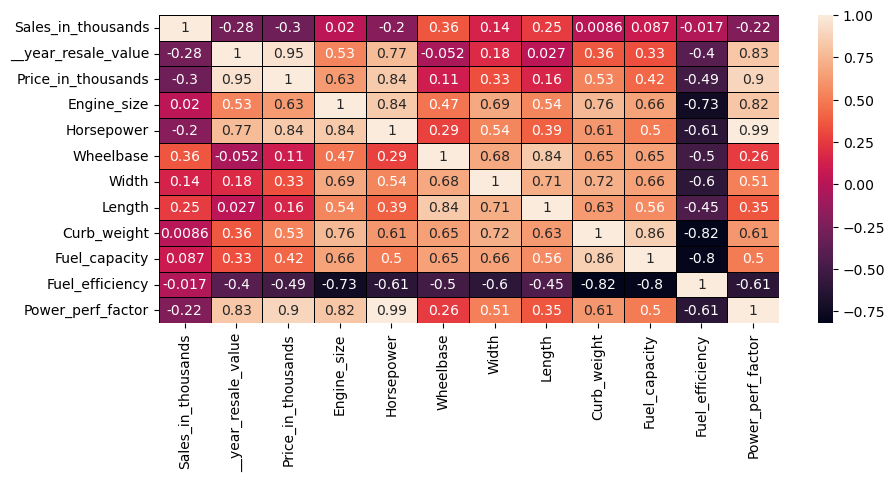

In [8]:
plt.figure(figsize=(10,4))
sb.heatmap(df.corr(),annot=True,linecolor='k',linewidths=.5);

# 5.Preprocessing data by dropping the year resale value feature and the missing value containing records.

In [9]:
df.drop(columns='__year_resale_value',axis=1,inplace=True)

In [10]:
df.isnull().sum()

Manufacturer          0
Model                 0
Sales_in_thousands    0
Vehicle_type          0
Price_in_thousands    2
Engine_size           1
Horsepower            1
Wheelbase             1
Width                 1
Length                1
Curb_weight           2
Fuel_capacity         1
Fuel_efficiency       3
Latest_Launch         0
Power_perf_factor     2
dtype: int64

In [11]:
df=df.dropna()

In [12]:
from sklearn.preprocessing import LabelEncoder
a=LabelEncoder()
df['Manufacturer']=a.fit_transform(df['Manufacturer'])
df['Model']=a.fit_transform(df['Model'])
df['Vehicle_type']=a.fit_transform(df['Vehicle_type'])
df['Latest_Launch']=a.fit_transform(df['Latest_Launch'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 0 to 156
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        152 non-null    int32  
 1   Model               152 non-null    int32  
 2   Sales_in_thousands  152 non-null    float64
 3   Vehicle_type        152 non-null    int32  
 4   Price_in_thousands  152 non-null    float64
 5   Engine_size         152 non-null    float64
 6   Horsepower          152 non-null    float64
 7   Wheelbase           152 non-null    float64
 8   Width               152 non-null    float64
 9   Length              152 non-null    float64
 10  Curb_weight         152 non-null    float64
 11  Fuel_capacity       152 non-null    float64
 12  Fuel_efficiency     152 non-null    float64
 13  Latest_Launch       152 non-null    int32  
 14  Power_perf_factor   152 non-null    float64
dtypes: float64(11), int32(4)
memory usage: 16.6 KB


In [14]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
df1=scale.fit_transform(df)
df=pd.DataFrame(df1,columns=df.columns)
df

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,-1.731004,0.065039,-0.530336,0.597614,-0.405800,-1.193989,-0.791180,-0.807785,-1.097174,-1.091782,-1.161844,-1.212659,0.969070,-0.442318,-0.734082
1,-1.731004,1.467461,-0.203388,0.597614,0.074328,0.143983,0.709634,0.089203,-0.228427,0.435008,0.221934,-0.193449,0.269868,0.749072,0.584374
2,-1.731004,0.846717,-0.651583,0.597614,1.020668,0.430691,0.444785,0.934192,0.090113,0.710575,0.746760,0.010393,-0.429335,-0.306933,0.585131
3,-1.613648,-1.544298,-0.479719,0.597614,-0.232537,-1.193989,-0.614614,-0.625788,-0.836550,-0.674708,-0.596040,-0.397291,0.736002,-1.173398,-0.554885
4,-1.613648,-1.521307,-0.503252,0.597614,0.460518,-0.238295,0.268218,0.167202,1.451150,0.367978,0.291280,0.137795,-0.429335,1.425998,0.313210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,1.672326,1.559423,-0.724977,0.597614,-0.204007,-1.098420,-0.438047,-0.898784,-1.010299,-0.778977,-0.526693,-0.550172,0.269868,1.561384,-0.406619
148,1.672326,1.076622,-0.554699,0.597614,0.011702,-0.620573,-0.296794,-0.326792,-0.518009,-0.086335,-0.265068,-0.015087,0.269868,-1.010936,-0.241041
149,1.672326,1.582413,-0.521430,0.597614,0.102161,-0.620573,-0.296794,-0.326792,-0.518009,-0.063992,-0.184689,-0.015087,0.269868,0.640764,-0.221060
150,1.672326,-1.176449,-0.725734,0.597614,1.264211,-0.716142,0.903857,-0.326792,0.119072,-0.101231,0.354322,0.137795,-0.196267,0.207531,0.992876


In [15]:
x=df
x

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,-1.731004,0.065039,-0.530336,0.597614,-0.405800,-1.193989,-0.791180,-0.807785,-1.097174,-1.091782,-1.161844,-1.212659,0.969070,-0.442318,-0.734082
1,-1.731004,1.467461,-0.203388,0.597614,0.074328,0.143983,0.709634,0.089203,-0.228427,0.435008,0.221934,-0.193449,0.269868,0.749072,0.584374
2,-1.731004,0.846717,-0.651583,0.597614,1.020668,0.430691,0.444785,0.934192,0.090113,0.710575,0.746760,0.010393,-0.429335,-0.306933,0.585131
3,-1.613648,-1.544298,-0.479719,0.597614,-0.232537,-1.193989,-0.614614,-0.625788,-0.836550,-0.674708,-0.596040,-0.397291,0.736002,-1.173398,-0.554885
4,-1.613648,-1.521307,-0.503252,0.597614,0.460518,-0.238295,0.268218,0.167202,1.451150,0.367978,0.291280,0.137795,-0.429335,1.425998,0.313210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,1.672326,1.559423,-0.724977,0.597614,-0.204007,-1.098420,-0.438047,-0.898784,-1.010299,-0.778977,-0.526693,-0.550172,0.269868,1.561384,-0.406619
148,1.672326,1.076622,-0.554699,0.597614,0.011702,-0.620573,-0.296794,-0.326792,-0.518009,-0.086335,-0.265068,-0.015087,0.269868,-1.010936,-0.241041
149,1.672326,1.582413,-0.521430,0.597614,0.102161,-0.620573,-0.296794,-0.326792,-0.518009,-0.063992,-0.184689,-0.015087,0.269868,0.640764,-0.221060
150,1.672326,-1.176449,-0.725734,0.597614,1.264211,-0.716142,0.903857,-0.326792,0.119072,-0.101231,0.354322,0.137795,-0.196267,0.207531,0.992876


# Task 2

# 1.Apply DBSCAN algorithm on selected feature (width and length) od cars by setting eps=0.35 and min_samples=11.

In [16]:
x1=df.iloc[:,[8,9]]
x1

,Width,Length
0,-1.097174,-1.091782
1,-0.228427,0.435008
2,0.090113,0.710575
3,-0.836550,-0.674708
4,1.451150,0.367978
...,...,...
147,-1.010299,-0.778977
148,-0.518009,-0.086335
149,-0.518009,-0.063992
150,0.119072,-0.101231


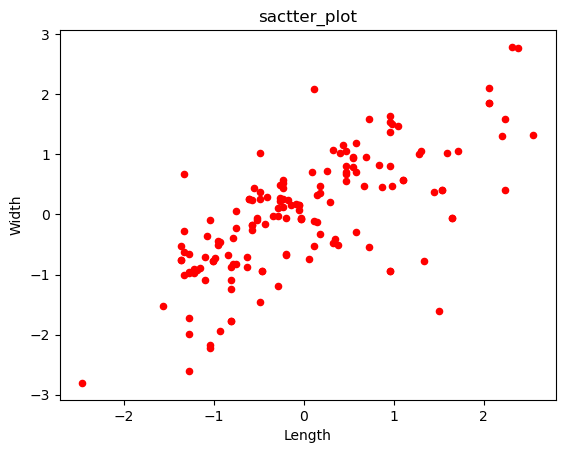

In [24]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.35,min_samples=11)
dbscan.fit_predict(x1)
x1['dbscan.labels_']=dbscan.labels_
plt.scatter(x1['Width'],x1['Length'],s=20,c='r')
plt.title('sactter_plot')
plt.xlabel('Length')
plt.ylabel('Width');

# Interpret obtained clusters details.

The two parameters is length and width and there eps or distance=0.35 andmin_samples=11.

# Task 3

# 1.Find optimum values of hypermeter of the DNSCAN algorithm.

In [18]:
from sklearn.cluster import DBSCAN
dbscan1=DBSCAN()
dbscan1.fit_predict(x)


array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

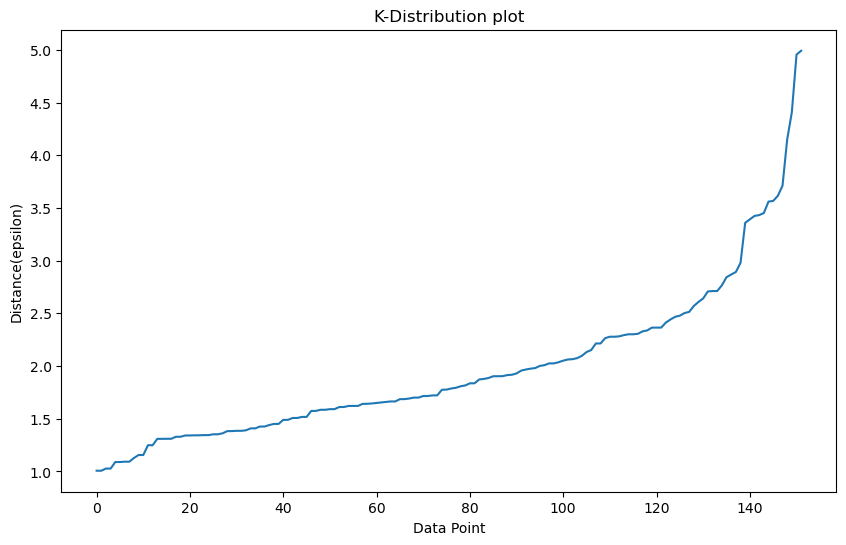

In [19]:
from sklearn.neighbors import NearestNeighbors
neigh=NearestNeighbors(n_neighbors=2)
nrbr=neigh.fit(x)
distance,indices=nrbr.kneighbors(x)
#plotting k-distribution
distances=np.sort(distance,axis=0)
distances=distances[:,1]
plt.figure(figsize=(10,6))
plt.plot(distances)
plt.title("K-Distribution plot")
plt.xlabel('Data Point')
plt.ylabel('Distance(epsilon)')
plt.show()

In [20]:
eps=3.0
for min_sample in [5,6,7,8,9,10]:
    clus= DBSCAN(eps=eps,min_samples=min_sample)
    clus_lbl=clus.fit_predict(x)
    p=clus_lbl+2
    q=np.bincount(p)
    ii=np.nonzero(q)[0]
    results=list(zip(ii,q[ii]))
    print('eps=',eps,'min_sample=',min_sample,'clustered=',results)



eps= 3.0 min_sample= 5 clustered= [(1, 19), (2, 133)]
eps= 3.0 min_sample= 6 clustered= [(1, 19), (2, 133)]
eps= 3.0 min_sample= 7 clustered= [(1, 19), (2, 133)]
eps= 3.0 min_sample= 8 clustered= [(1, 19), (2, 133)]
eps= 3.0 min_sample= 9 clustered= [(1, 19), (2, 133)]
eps= 3.0 min_sample= 10 clustered= [(1, 19), (2, 133)]


# Task 4

# Apply the DBSCAN algorithm to all features by setting optimum hypermeter values.

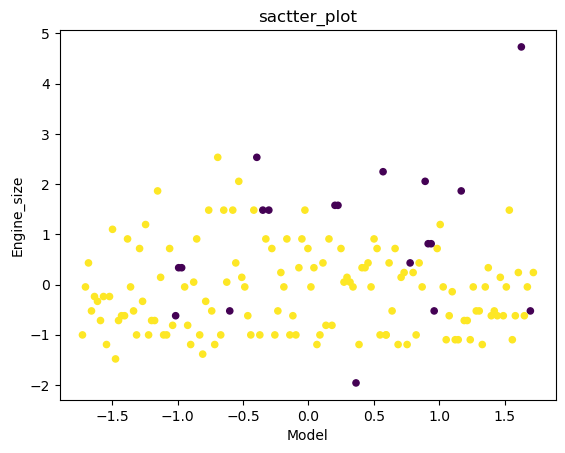

In [32]:
db_model=DBSCAN(eps=3.0,min_samples=6)
db_model.fit(x)
x['db_model.labels']=db_model.labels_
plt.scatter(x['Model'],x['Engine_size'],s=20,c=x['db_model.labels'])
plt.title('sactter_plot')
plt.xlabel('Model')
plt.ylabel('Engine_size');



# Interpret obtained cluster in details.

The two parameters is Model and Engine_size and there eps or distance=3.0 andmin_samples=6.
one parameter is gettng high compare to other parameter.